In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression



warnings.filterwarnings("ignore", message=".*does not have valid feature names.*")


dict_f1 = dict()
dict_f1['model'] = []
dict_f1['score'] = []
dict_f1['time'] = []


dict_f2 = dict()
dict_f2['model'] = []
dict_f2['score'] = []
dict_f2['time'] = []


dict_f3 = dict()
dict_f3['model'] = []
dict_f3['score'] = []
dict_f3['time'] = []

# Регрессия

In [2]:
data = pd.read_csv("gen_regression.csv")
data.head()

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


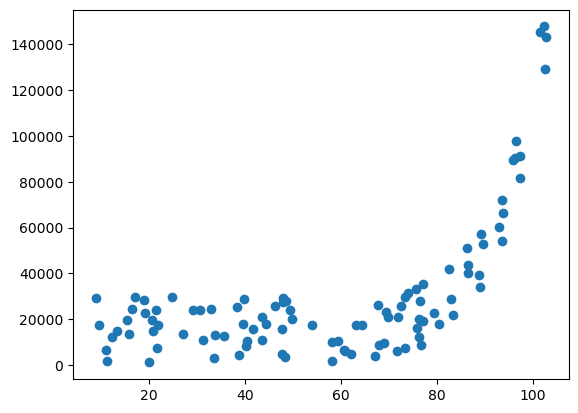

In [3]:
X = data.x
y = data.y
plt.scatter(X, y)

Время обучения модели: 0.0050 секунд


0.37467360318911636

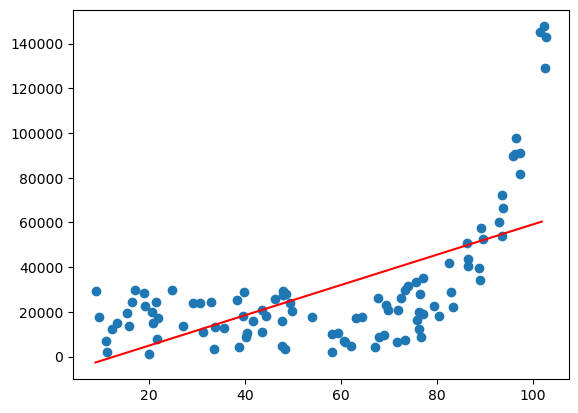

In [4]:
data = pd.read_csv("gen_regression.csv")

X = data.x
y = data.y

X = pd.DataFrame(X)

start_time = time.time()  # Начало замера времени

linear = LinearRegression().fit(X, y)

linear_time = time.time() - start_time  # Конец замера времени
print(f"Время обучения модели: {linear_time:.4f} секунд")

xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))

plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')



linear.score(X, y)

In [5]:
transformation = PolynomialFeatures(degree=2)

transformation.fit(X)

X_2 = transformation.transform(X)
X_2.shape
X_2[:5]


array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03],
       [1.00000000e+00, 4.80028921e+01, 2.30427765e+03],
       [1.00000000e+00, 4.79397558e+01, 2.29822018e+03],
       [1.00000000e+00, 4.78090258e+01, 2.28570295e+03],
       [1.00000000e+00, 6.97844271e+01, 4.86986627e+03]])

Время обучения модели: 0.0046 секунд


0.7359753787024841

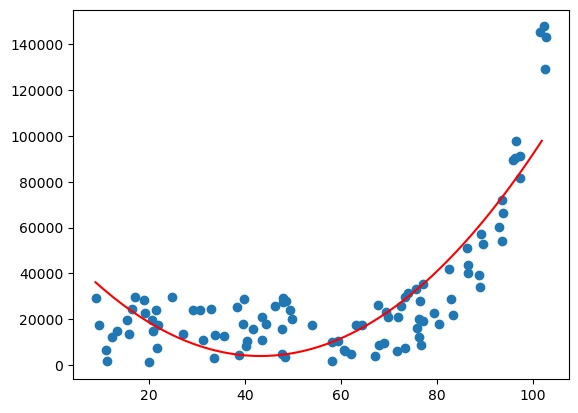

In [6]:
start_time = time.time()  # Начало замера времени
poly_2d = LinearRegression().fit(X_2, y)
linear_time = time.time() - start_time  # Конец замера времени

print(f"Время обучения модели: {linear_time:.4f} секунд")



xx_2d = transformation.transform(pd.DataFrame(xx))

yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')



poly_2d.score(X_2, y)

# Классификация

In [7]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)
data.head()

,x1,x2,y
0,0.048289,0.267592,1
1,1.363151,0.171123,0
2,-0.424253,0.893937,0
3,0.112344,0.565672,0
4,-1.262453,0.521735,0


In [8]:
y = data.y
X = data.drop(["y"], axis=1)

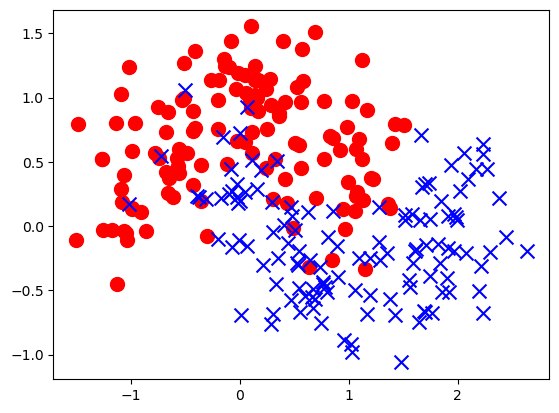

In [9]:
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

Время обучения модели: 0.0053 секунд


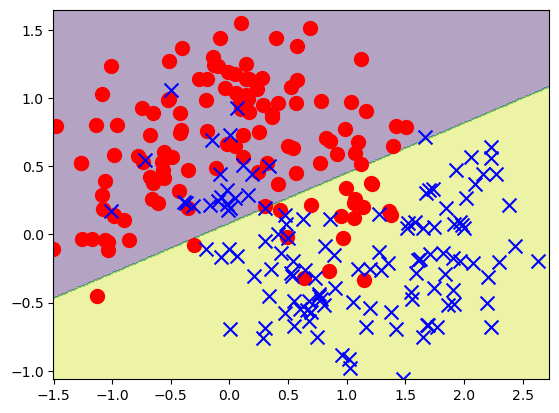

0.832

In [10]:
start_time = time.time()  # Начало замера времени
logistic = LogisticRegression().fit(X, y)
linear_time = time.time() - start_time  # Конец замера времени

print(f"Время обучения модели: {linear_time:.4f} секунд")


xx, yy = np.meshgrid(
    np.arange(X.min().iloc[0], X.max().iloc[0]+0.1, 0.01),
    np.arange(X.min().iloc[1], X.max().iloc[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)
plt.show()


logistic.score(X, y)

In [11]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

In [12]:
X_3.shape

(250, 9)

Время обучения модели: 0.0020 секунд


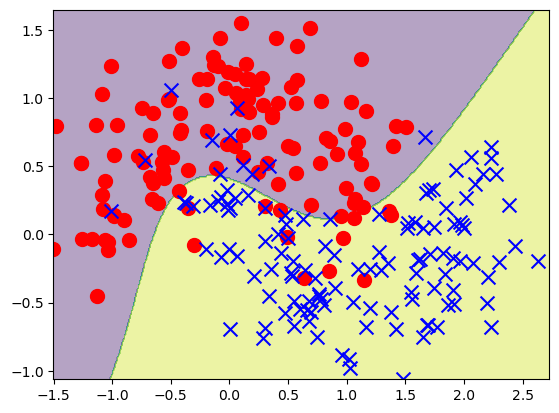

0.9

In [13]:
start_time = time.time()  # Начало замера времени

class_3 = LogisticRegression().fit(X_3, y)
linear_time = time.time() - start_time  # Конец замера времени

print(f"Время обучения модели: {linear_time:.4f} секунд")

Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)
plt.show()


class_3.score(X_3, y)

In [14]:
for deg in range(1,101):
    class_transform = PolynomialFeatures(degree=3, include_bias=False)
    X_3 = class_transform.fit_transform(X)

    start_time = time.time()  # Начало замера времени
    class_3 = LogisticRegression().fit(X_3, y)
    linear_time = time.time() - start_time  # Конец замера времени

    dict_f2['model'].append(f'LogisticRegression degree = {deg}')
    dict_f2['score'].append(class_3.score(X_3, y))
    dict_f2['time'].append(f'{linear_time:.4f}')

# Регрессия на реальных данных

In [15]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [16]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

In [18]:
X_kc_prices.shape, y_kc_prices.shape

((21613, 18), (21613,))

Время обучения модели: 0.0155 секунд


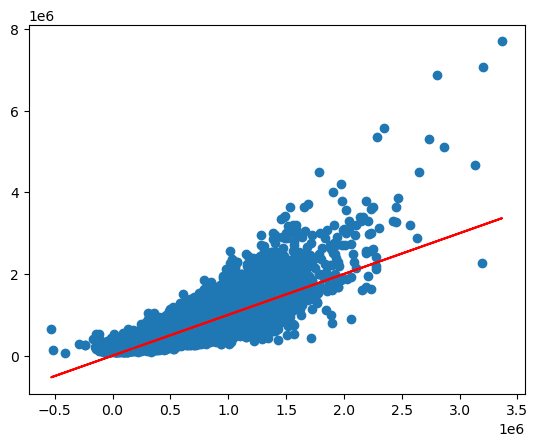

0.6997471890109157

In [19]:
start_time = time.time()  # Начало замера времени
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
linear_time = time.time() - start_time  # Конец замера времени

print(f"Время обучения модели: {linear_time:.4f} секунд")


y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')
plt.show()

dict_f3['model'].append('LinearRegression degree = 1')
dict_f3['score'].append(reg_kc_multiple.score(X_kc_prices, y_kc_prices))
dict_f3['time'].append(f'{linear_time:.4f}')

reg_kc_multiple.score(X_kc_prices, y_kc_prices)

Время обучения модели: 1.1219 секунд


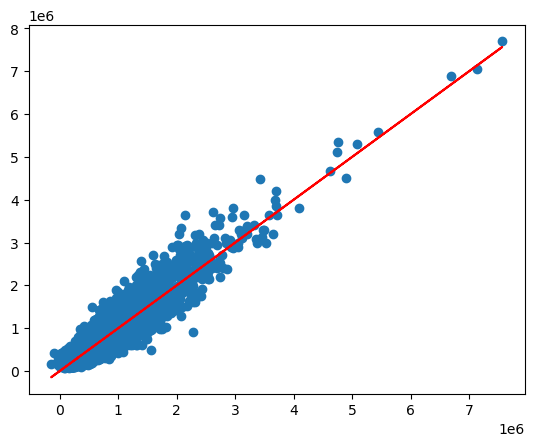

0.8650636022320003

In [20]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)

start_time = time.time()  # Начало замера времени
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
linear_time = time.time() - start_time  # Конец замера времени

print(f"Время обучения модели: {linear_time:.4f} секунд")



y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')
plt.show()


dict_f3['model'].append('LinearRegression degree = 3')
dict_f3['score'].append(reg_poly2_kc.score(X_3_kc_prices, y_kc_prices))
dict_f3['time'].append(f'{linear_time:.4f}')

reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)

# Задания для самостоятельного выполнения

## 2. На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.

### No polynomial transformation

Время обучения модели: 0.0009 секунд


0.37467360318911636

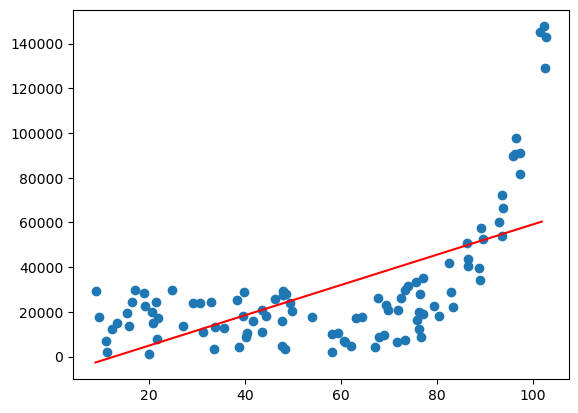

In [21]:
data = pd.read_csv("gen_regression.csv")

X = data.x
y = data.y


X = pd.DataFrame(X)

start_time = time.time()  # Начало замера времени

linear = LinearRegression().fit(X, y)

linear_time = time.time() - start_time  # Конец замера времени
print(f"Время обучения модели: {linear_time:.4f} секунд")

xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))

plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')
linear.score(X, y)

### degree == 5

Время обучения модели: 0.0000 секунд


0.9217478060447017

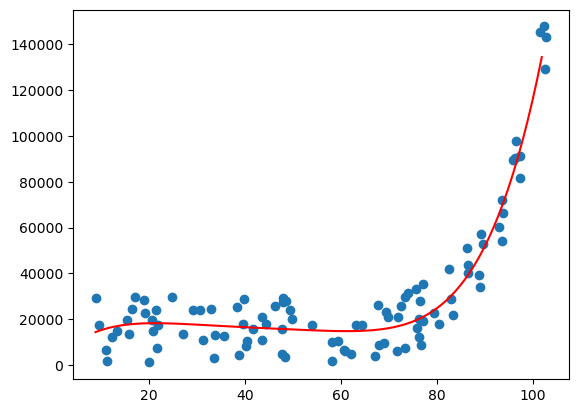

In [22]:
deg = 5

transformation = PolynomialFeatures(degree=deg)

transformation.fit(X)

X_2 = transformation.transform(X)

start_time = time.time()  # Начало замера времени
poly_2d = LinearRegression().fit(X_2, y)
linear_time = time.time() - start_time  # Конец замера времени

print(f"Время обучения модели: {linear_time:.4f} секунд")



xx_2d = transformation.transform(pd.DataFrame(xx))

yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X, y)
plt.plot(xx, yy_2d, c='r')

poly_2d.score(X_2, y)

### degree == 10

Время обучения модели: 0.0019 секунд


0.923200206258652

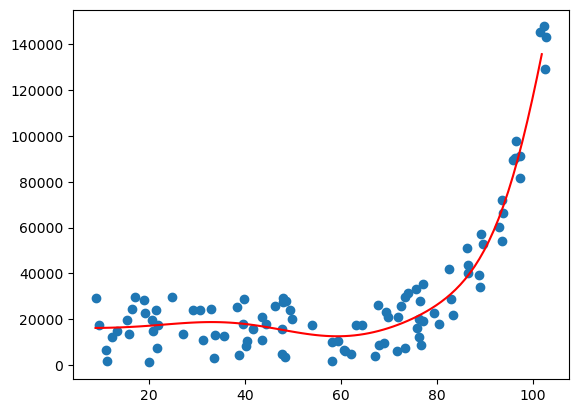

In [23]:
deg = 10

transformation = PolynomialFeatures(degree=deg)

transformation.fit(X)

X_2 = transformation.transform(X)

start_time = time.time()  # Начало замера времени
poly_2d = LinearRegression().fit(X_2, y)
linear_time = time.time() - start_time  # Конец замера времени

print(f"Время обучения модели: {linear_time:.4f} секунд")



xx_2d = transformation.transform(pd.DataFrame(xx))

yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X, y)
plt.plot(xx, yy_2d, c='r')


poly_2d.score(X_2, y)

### degree == 100

Время обучения модели: 0.0034 секунд


0.7915643030729562

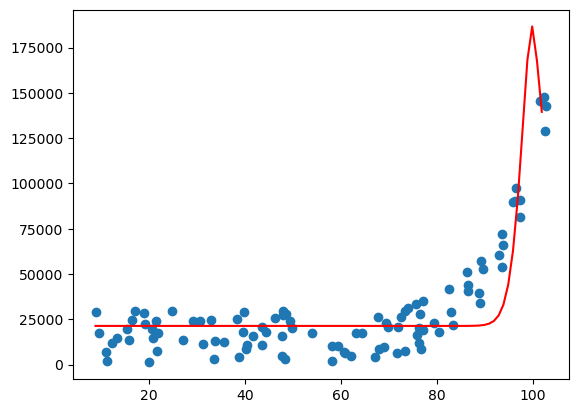

In [24]:
deg = 100

transformation = PolynomialFeatures(degree=deg)

transformation.fit(X)

X_2 = transformation.transform(X)

start_time = time.time()  # Начало замера времени
poly_2d = LinearRegression().fit(X_2, y)
linear_time = time.time() - start_time  # Конец замера времени

print(f"Время обучения модели: {linear_time:.4f} секунд")



xx_2d = transformation.transform(pd.DataFrame(xx))

yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X, y)
plt.plot(xx, yy_2d, c='r')


poly_2d.score(X_2, y)

### Обучим 100 моделей

In [25]:
for deg in range(1,101):
    transformation = PolynomialFeatures(degree=deg)

    transformation.fit(X)

    X_2 = transformation.transform(X)

    start_time = time.time()  # Начало замера времени
    poly_2d = LinearRegression().fit(X_2, y)
    linear_time = time.time() - start_time  # Конец замера времени

    dict_f1['model'].append(f'LinearRegression degree = {deg}')
    dict_f1['score'].append(poly_2d.score(X_2, y))
    dict_f1['time'].append(f'{linear_time:.4f}')

## 3. То же самое проделайте с датасетом для классификации и "King county".

### No plynomial transformation

Время обучения модели: 0.0081 секунд


0.6997471890109157

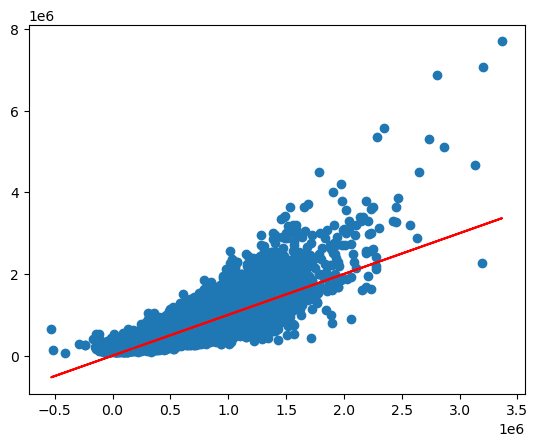

In [26]:
start_time = time.time()  # Начало замера времени
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
linear_time = time.time() - start_time  # Конец замера времени

print(f"Время обучения модели: {linear_time:.4f} секунд")


y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

reg_kc_multiple.score(X_kc_prices, y_kc_prices)

### degree == 5

In [27]:
'''deg = 5

transformation = PolynomialFeatures(degree=deg)

transformation.fit(X_kc_prices)

X_3_kc_prices = transformation.transform(X_kc_prices)


start_time = time.time()  # Начало замера времени
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
linear_time = time.time() - start_time  # Конец замера времени

print(f"Время обучения модели: {linear_time:.4f} секунд")



y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')
plt.show()


reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)'''

'deg = 5\n\ntransformation = PolynomialFeatures(degree=deg)\n\ntransformation.fit(X_kc_prices)\n\nX_3_kc_prices = transformation.transform(X_kc_prices)\n\n\nstart_time = time.time()  # Начало замера времени\nreg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)\nlinear_time = time.time() - start_time  # Конец замера времени\n\nprint(f"Время обучения модели: {linear_time:.4f} секунд")\n\n\n\ny_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)\nplt.scatter(y_pred_kc_prices, y_kc_prices)\nplt.plot(y_pred_kc_prices, y_pred_kc_prices, c=\'r\')\nplt.show()\n\n\nreg_poly2_kc.score(X_3_kc_prices, y_kc_prices)'

### degree == 10

In [28]:
'''deg = 10


transformation = PolynomialFeatures(degree=deg)

transformation.fit(X_kc_prices)

X_3_kc_prices = transformation.transform(X_kc_prices)


start_time = time.time()  # Начало замера времени
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
linear_time = time.time() - start_time  # Конец замера времени

print(f"Время обучения модели: {linear_time:.4f} секунд")



y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')
plt.show()


reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)'''

'deg = 10\n\n\ntransformation = PolynomialFeatures(degree=deg)\n\ntransformation.fit(X_kc_prices)\n\nX_3_kc_prices = transformation.transform(X_kc_prices)\n\n\nstart_time = time.time()  # Начало замера времени\nreg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)\nlinear_time = time.time() - start_time  # Конец замера времени\n\nprint(f"Время обучения модели: {linear_time:.4f} секунд")\n\n\n\ny_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)\nplt.scatter(y_pred_kc_prices, y_kc_prices)\nplt.plot(y_pred_kc_prices, y_pred_kc_prices, c=\'r\')\nplt.show()\n\n\nreg_poly2_kc.score(X_3_kc_prices, y_kc_prices)'

### degree == 100

In [29]:
'''deg = 100

transformation = PolynomialFeatures(degree=deg)

transformation.fit(X_kc_prices)

X_3_kc_prices = transformation.transform(X_kc_prices)


start_time = time.time()  # Начало замера времени
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
linear_time = time.time() - start_time  # Конец замера времени

print(f"Время обучения модели: {linear_time:.4f} секунд")



y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')
plt.show()


reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)'''

'deg = 100\n\ntransformation = PolynomialFeatures(degree=deg)\n\ntransformation.fit(X_kc_prices)\n\nX_3_kc_prices = transformation.transform(X_kc_prices)\n\n\nstart_time = time.time()  # Начало замера времени\nreg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)\nlinear_time = time.time() - start_time  # Конец замера времени\n\nprint(f"Время обучения модели: {linear_time:.4f} секунд")\n\n\n\ny_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)\nplt.scatter(y_pred_kc_prices, y_kc_prices)\nplt.plot(y_pred_kc_prices, y_pred_kc_prices, c=\'r\')\nplt.show()\n\n\nreg_poly2_kc.score(X_3_kc_prices, y_kc_prices)'

Код для создания этих моделей есть, но производственных мощностей компьютера не хватает для реализации обучения этих моделей.

## 4. Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.

In [30]:
f1 = pd.DataFrame(dict_f1).set_index('model')
display(f1.sort_values('score', ascending=False))
f2 = pd.DataFrame(dict_f2).set_index('model')
display(f2.sort_values('score', ascending=False))
f3 = pd.DataFrame(dict_f3).set_index('model')
display(f3.sort_values('score', ascending=False))

,score,time
model,,
LinearRegression degree = 13,0.924829,0.0010
LinearRegression degree = 14,0.924808,0.0010
LinearRegression degree = 15,0.924731,0.0010
LinearRegression degree = 16,0.924714,0.0010
LinearRegression degree = 17,0.924706,0.0010
...,...,...
LinearRegression degree = 99,0.794386,0.0010
LinearRegression degree = 98,0.793198,0.0010
LinearRegression degree = 100,0.791564,0.0010


,score,time
model,,
LogisticRegression degree = 1,0.9,0.0020
LogisticRegression degree = 64,0.9,0.0014
LogisticRegression degree = 74,0.9,0.0021
LogisticRegression degree = 73,0.9,0.0010
LogisticRegression degree = 72,0.9,0.0025
...,...,...
LogisticRegression degree = 31,0.9,0.0020
LogisticRegression degree = 30,0.9,0.0015
LogisticRegression degree = 29,0.9,0.0020


,score,time
model,,
LinearRegression degree = 3,0.865064,1.1219
LinearRegression degree = 1,0.699747,0.0155


## 5. Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.

In [31]:
# Предположим, что X_kc_prices — это DataFrame с аттрибутами
# и reg_kc_multiple — обученная линейная модель

y_kc_prices = pd.DataFrame(data_kc_prices.price)
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

s = StandardScaler().fit(y_kc_prices)
y_kc_prices = pd.DataFrame(s.transform(y_kc_prices))

s = StandardScaler().fit(X_kc_prices)
X_kc_prices = pd.DataFrame(s.transform(X_kc_prices))

start_time = time.time()  # Начало замера времени
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
linear_time = time.time() - start_time  # Конец замера времени


# Создадим DataFrame для отображения коэффициентов и их соответствующих атрибутов
coef_df = pd.DataFrame({
    'Feature': data_kc_prices.drop(["id", "date", "price"], axis=1).columns,
    'Coefficient': reg_kc_multiple.coef_.flatten()
})

# Сортировка коэффициентов по абсолютной величине для выявления наиболее важных атрибутов
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Выводим результат
coef_df[['Feature', 'Coefficient']].set_index('Feature')

,Coefficient
Feature,
grade,0.307020
lat,0.227493
sqft_living,0.222850
yr_built,-0.209641
sqft_above,0.207850
waterfront,0.137380
view,0.110359
bedrooms,-0.090609
bathrooms,0.086313


Параметр `grade` сильнее остальных влияет на целевую переменную

## 6.Попробуйте также проинтерпретировать полиномиальную модель.

In [32]:
deg = 3

transformation = PolynomialFeatures(degree=deg)
transformation.fit(data_kc_prices.drop(["id", "date", "price"], axis=1))
X_3_kc_prices = transformation.transform(data_kc_prices.drop(["id", "date", "price"], axis=1))

s = StandardScaler().fit(X_3_kc_prices)
X_3_kc_prices = pd.DataFrame(s.transform(X_3_kc_prices))



start_time = time.time()  # Начало замера времени
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
linear_time = time.time() - start_time  # Конец замера времени


display()

# Создадим DataFrame для отображения коэффициентов и их соответствующих атрибутов
coef_df = pd.DataFrame({
    'Feature': transformation.get_feature_names_out(data_kc_prices.drop(["id", "date", "price"], axis=1).columns),
    'Coefficient': reg_poly2_kc.coef_.flatten()
})

# Сортировка коэффициентов по абсолютной величине для выявления наиболее важных атрибутов
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Выводим результат
coef_df[['Feature', 'Coefficient']].set_index('Feature')

,Coefficient
Feature,
sqft_living sqft_above yr_renovated,-1.509520e+09
sqft_living sqft_basement long,-1.361151e+09
sqft_living waterfront sqft_basement,-1.358408e+09
sqft_above^2 yr_renovated,1.309495e+09
sqft_living condition yr_renovated,-1.029332e+09
...,...
view^2 yr_built,3.849491e-03
waterfront grade sqft_living15,3.486600e-03
bedrooms sqft_lot yr_renovated,-2.957877e-03


Здесь видно, что сильнее остальных линейных комбинаций влияет комбинация признаков `sqft_living`,  `sqft_above`,  `yr_renovated`